<a name="1"></a>
# **<h1 id="1" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Machine Learning Final Project: Question 2</h1>**

# Data Visualization
## Team members:
 - ## <span style="color:green">521H0489: Hồ Hữu An</span>.
 - ## <span style="color:green">521H0491: Trần Nhựt Anh</span>.
 - ## <span style="color:green">521H0290: Đỗ Minh Quân</span>.

<div style="border-radius:10px; padding: 15px; text-align:left; font-size:120%">

<h4 align="left"><span style="font-weight:900; font-size:200%"><font color=#d10202>About Dataset</font></span></h4>    
    
<h4 align="left"><span style="font-weight:900; font-size:160%"><font color=#d1026a>Bank Term Deposit Predictions</font></span></h4>

This `dataset`, titled Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.

The dataset contains various features that provide insights into customer attributes and campaign outcomes. These features include:

- `Age` : The age of the customer.(numeric)
- `Job` : The occupation of the customer.(categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
- `Marital Status` : The marital status of the customer.(categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- `Education` : The education level of the customer.(categorical: "unknown","secondary","primary","tertiary")
- `Default` : Whether or not the customer has credit in default.(binary: "yes","no")
- `Balance` : The balance of the customer's account.(numeric)
- `Housing Loan` : Whether or not the customer has a housing loan.(binary: "yes","no")
- `loan` : Whether or not the customer has a personal loan. (binary: "yes","no") 

### related with the last contact of the current campaign
- `Contact Communication Type` : The method used to contact the customer. (categorical: "unknown","telephone","cellular")
- `Day` : The day of the month when the last contact with the customers was made. (numeric)
- `Month` : The month when the last contact with the customers was made.
- `Duration` : The duration (in seconds) of the last contact with customers during a campaign. (numeric)

### other attributes:
- `Campaign Contacts Count` : Number of contacts performed during this campaign for each customer (numeric, includes last contact)
- `pdays` : number days passed since previously contacted form previous camapign (numeric, -1 means client was not previously contacted)
- `previous`: number of contacts performed before this campaign and for this client (numeric)
- `poutcome` : outcome from previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
- `y` : has the client subscribed a term deposit? (binary: "yes","no")

The purpose behind this dataset is to train a predictive model that can determine if a given customer will subscribe to a term deposit based on these various features. By analyzing historical data on successful and unsuccessful subscription outcomes, patterns can be identified which help predict future subscription behavior.

<a name="1"></a>
# **<h1 id="1" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Import Libraries</h1>**

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

<a name="2"></a>
# **<h1 id="2" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Exploratory Data Analysis and Wrangling</h1>**

## `Read data`

In [64]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

## `Get sample`

In [65]:
train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21675,55,retired,married,secondary,no,168,no,no,cellular,19,aug,79,2,-1,0,unknown,no
37612,32,admin.,single,secondary,no,-133,yes,no,cellular,14,may,119,1,352,2,failure,no
23376,38,housemaid,married,primary,no,3918,no,no,cellular,27,aug,101,3,-1,0,unknown,no
5172,37,blue-collar,married,primary,no,1455,yes,no,unknown,21,may,165,2,-1,0,unknown,no
21524,33,technician,married,secondary,no,81,no,no,cellular,19,aug,671,2,-1,0,unknown,no
44771,47,technician,married,secondary,no,1740,yes,no,cellular,13,sep,502,1,490,1,failure,no
7120,40,blue-collar,married,secondary,no,327,yes,no,unknown,29,may,134,1,-1,0,unknown,no
23505,34,management,married,tertiary,no,3486,no,no,cellular,28,aug,23,10,-1,0,unknown,no
32321,74,retired,married,secondary,no,3771,no,no,telephone,16,apr,159,1,-1,0,unknown,no
43123,48,housemaid,married,tertiary,no,5473,no,no,cellular,24,feb,127,2,184,2,success,yes


In [66]:
test_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1391,21,services,single,secondary,no,361,no,no,telephone,5,jun,329,1,95,1,other,no
1140,36,management,single,tertiary,no,3875,yes,no,unknown,27,may,21,5,-1,0,unknown,no
1822,31,management,married,tertiary,no,156,no,no,cellular,13,aug,657,7,-1,0,unknown,yes
2688,27,services,married,secondary,no,-1202,yes,no,unknown,4,jun,749,2,-1,0,unknown,no
938,37,technician,married,secondary,no,1633,yes,no,unknown,19,may,229,3,-1,0,unknown,no
86,41,technician,single,secondary,no,879,no,yes,cellular,7,jul,60,4,-1,0,unknown,no
3315,33,admin.,married,tertiary,no,79,yes,no,cellular,22,oct,249,2,335,2,failure,yes
813,31,management,married,secondary,no,466,yes,no,cellular,14,may,164,1,-1,0,unknown,no
4045,34,technician,single,secondary,no,60,no,no,cellular,7,aug,274,2,-1,0,unknown,no
4453,35,blue-collar,married,secondary,no,5304,yes,no,cellular,20,nov,340,1,183,2,failure,no


## `Get data informaion`

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<a name="3"></a>
# **<h1 id="3" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Statistical analysis on data and Visualization</h1>**

## `Overview statistics`

In [68]:
train_df.describe().round(2).style.format(precision=2).background_gradient(cmap="Blues")

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


## `Correlation Matrix`

Text(0.5, 1.0, 'Data correlations')

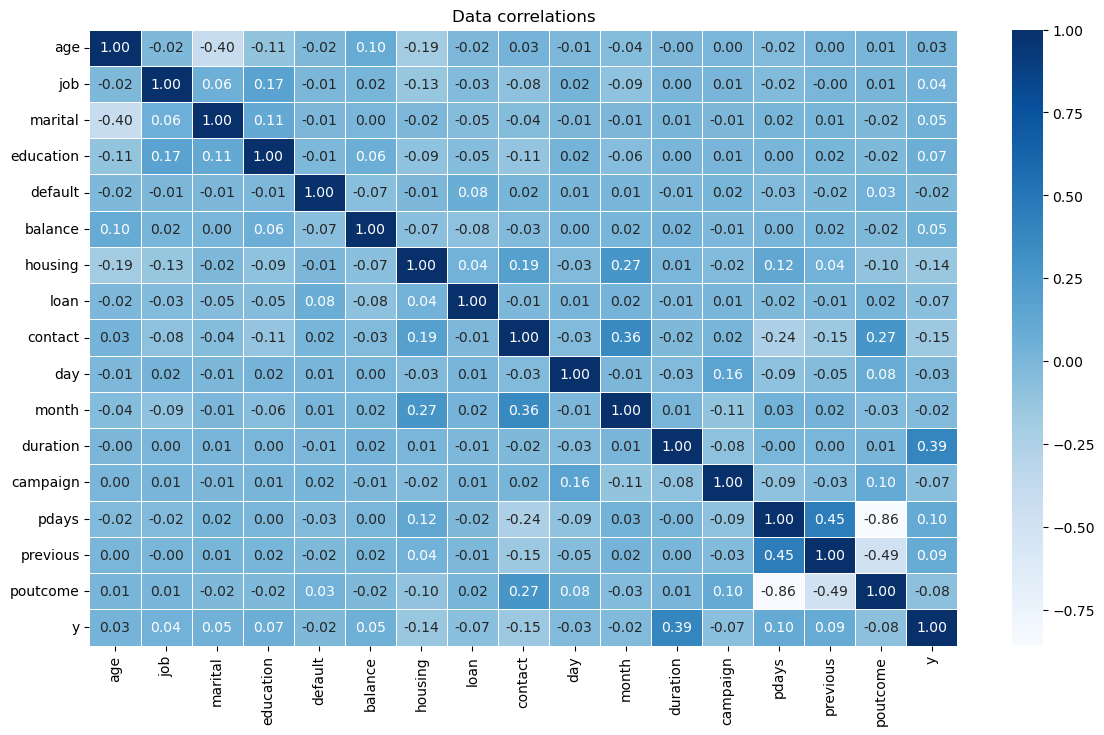

In [69]:
encoded_train = train_df.copy()

for column in encoded_train.columns:
    if encoded_train[column].dtype == 'object':
        label_encoder = LabelEncoder()
        encoded_train[column] = label_encoder.fit_transform(encoded_train[column])

correlation = encoded_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

## `Chart Box`

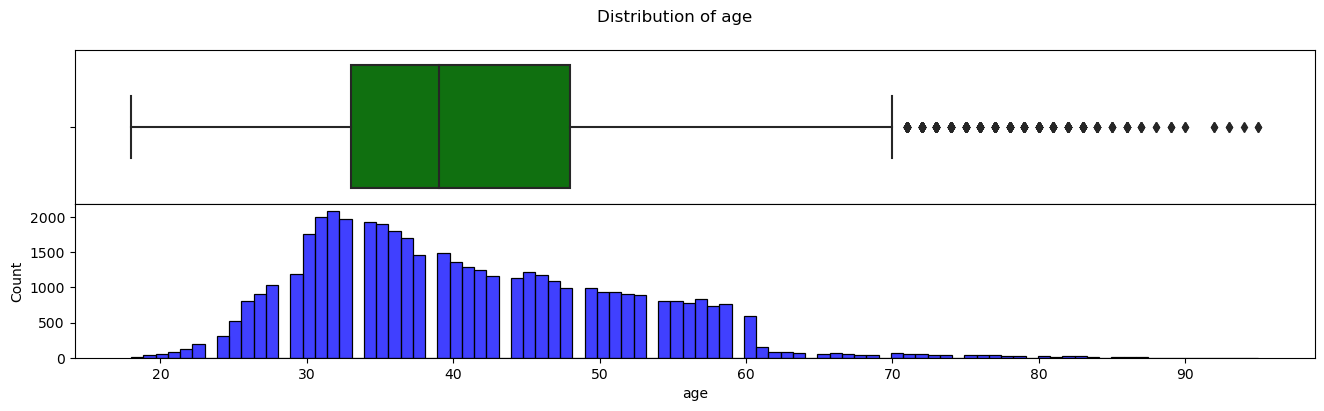

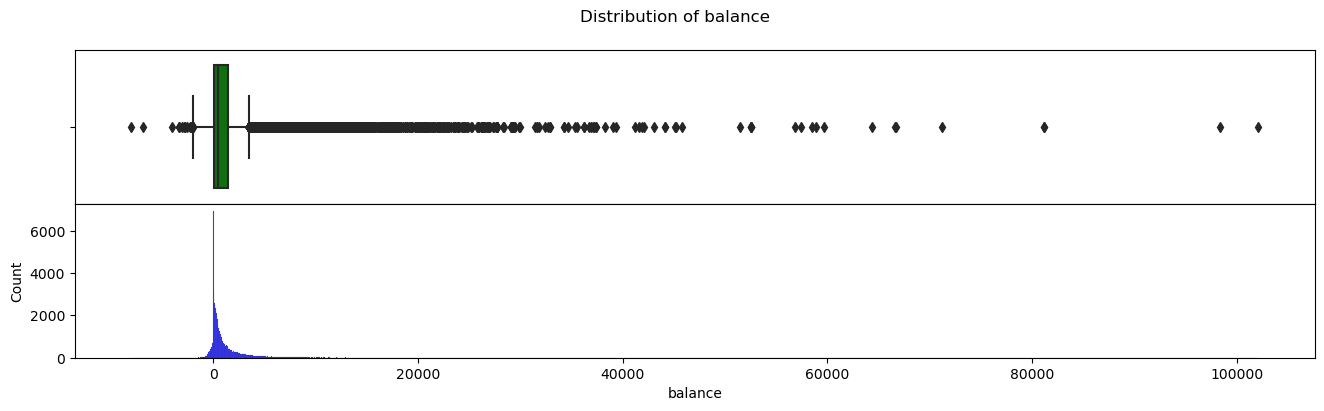

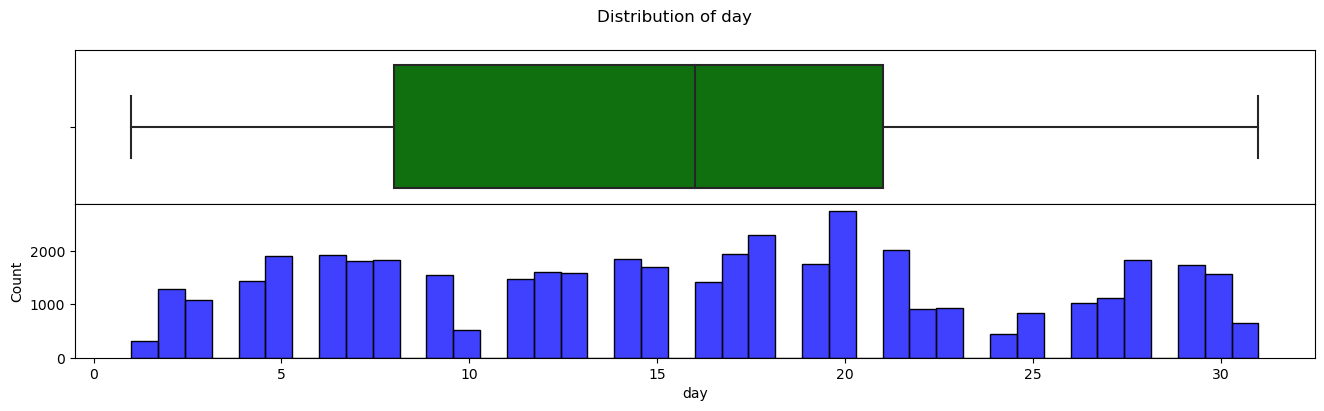

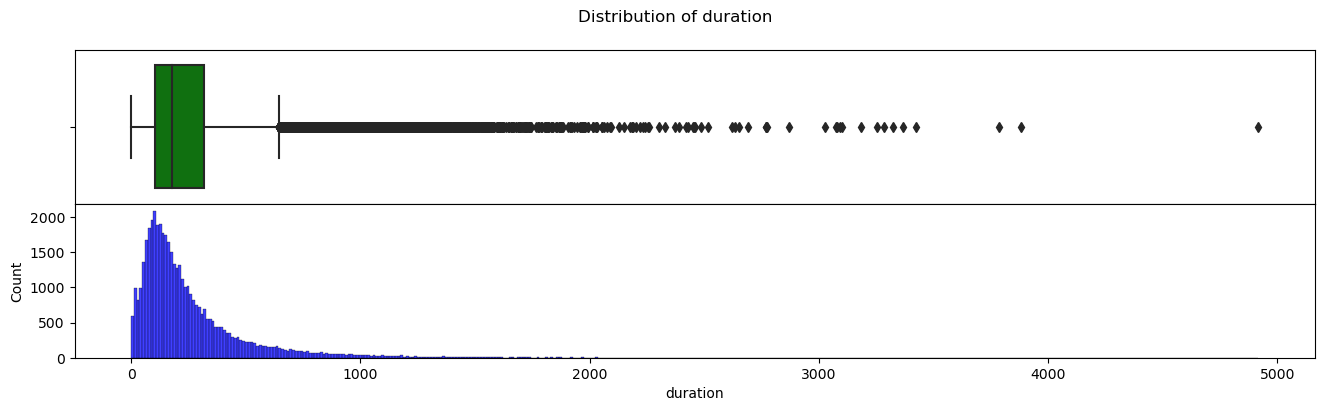

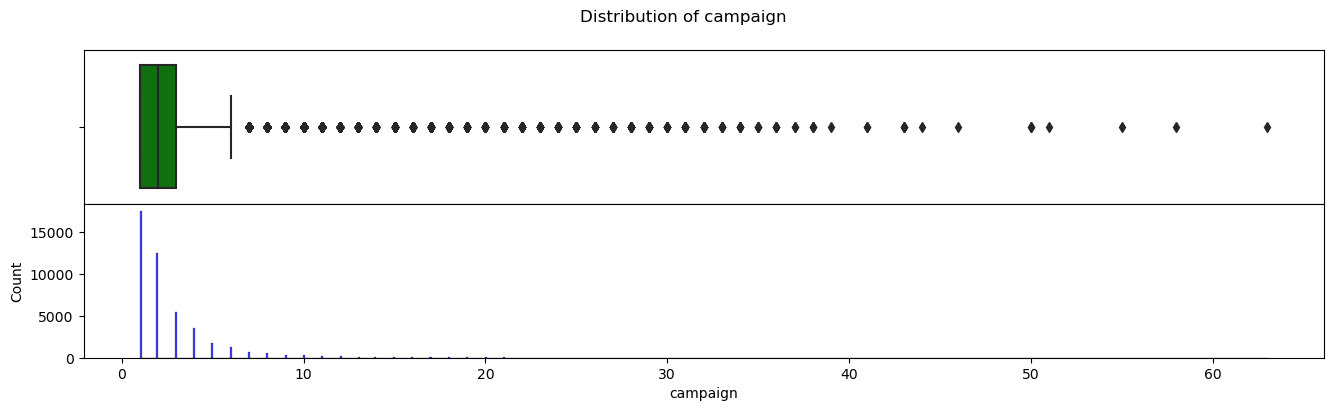

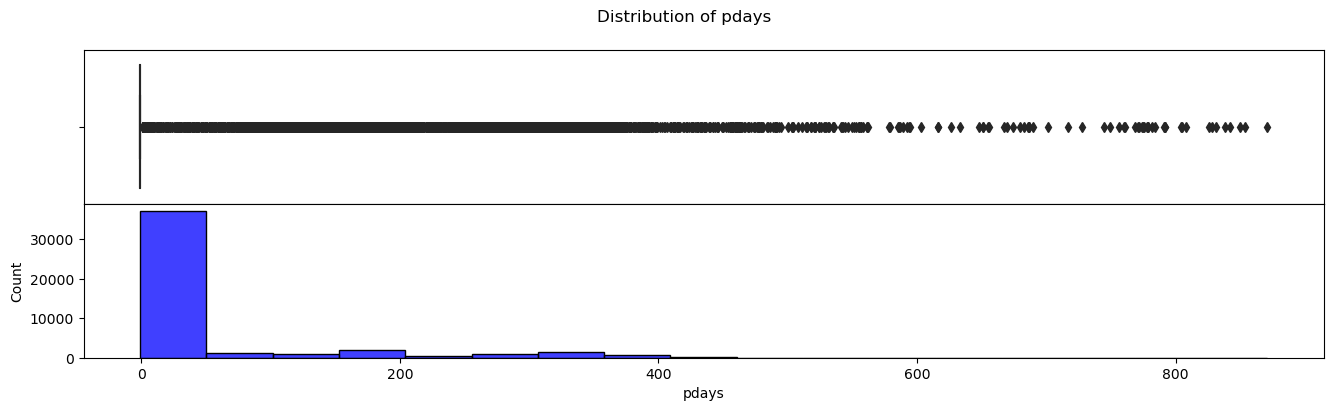

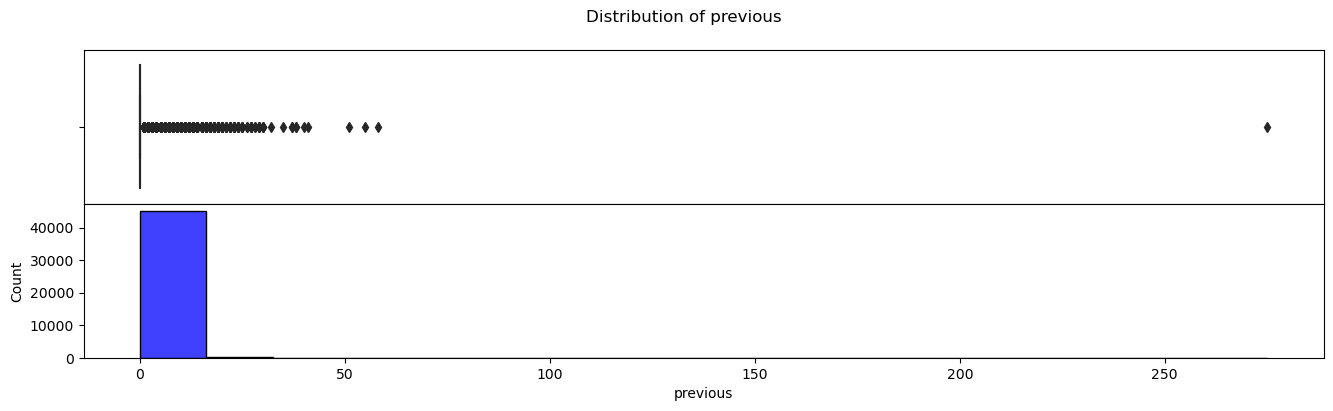

In [70]:
numerical = train_df.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
    plt.suptitle(f"Distribution of {col}")
    sns.boxplot(data=train_df, x=col, ax=ax1, color="Green")
    ax1.set_xlabel(None)
    ax1.get_xaxis().set_ticks([])
    sns.histplot(data=train_df, x=col, ax=ax2, color="Blue")
    plt.subplots_adjust(hspace=0)
    print("\n")
    plt.show()

## `Job Feature`

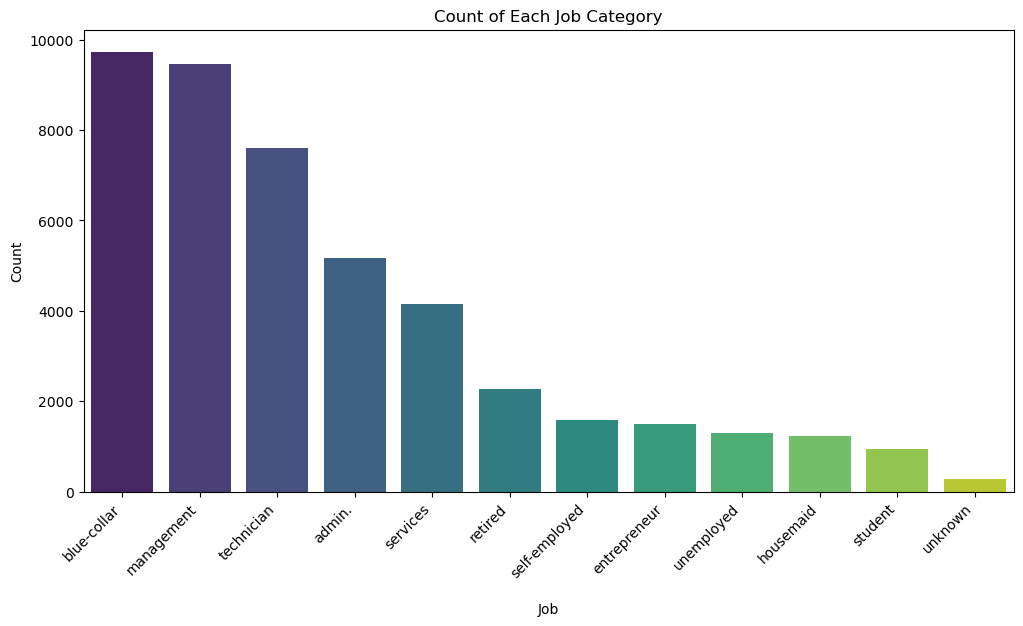

In [71]:
job_counts = train_df['job'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Count of Each Job Category')
plt.xlabel('\nJob')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## `Marital-Status Feature`

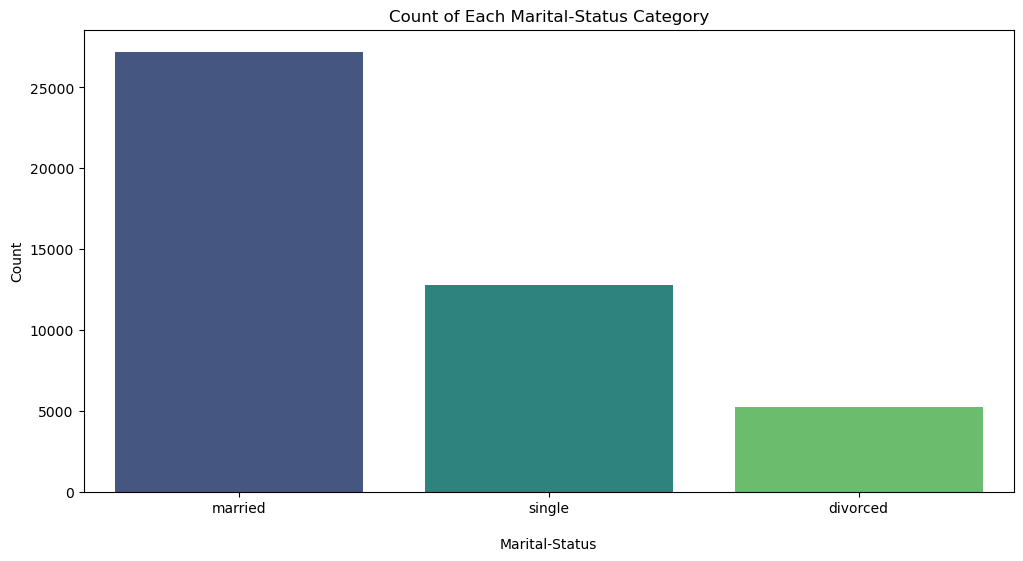

In [72]:
marital_counts = train_df['marital'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')
plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')
plt.show()

## `Education Feature`

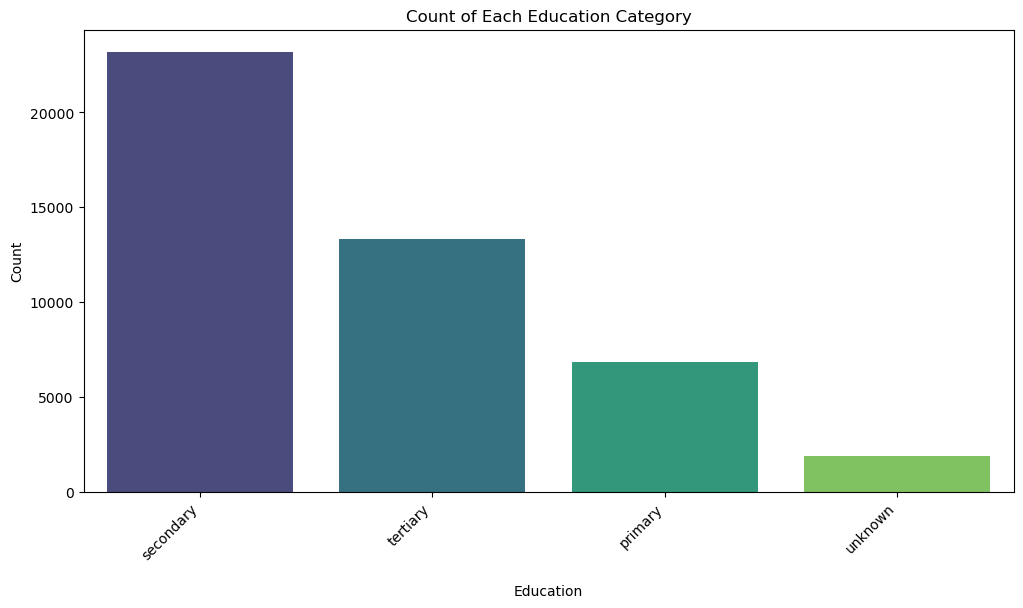

In [73]:
education_counts = train_df['education'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title('Count of Each Education Category')
plt.xlabel('\nEducation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## `Default Feature`

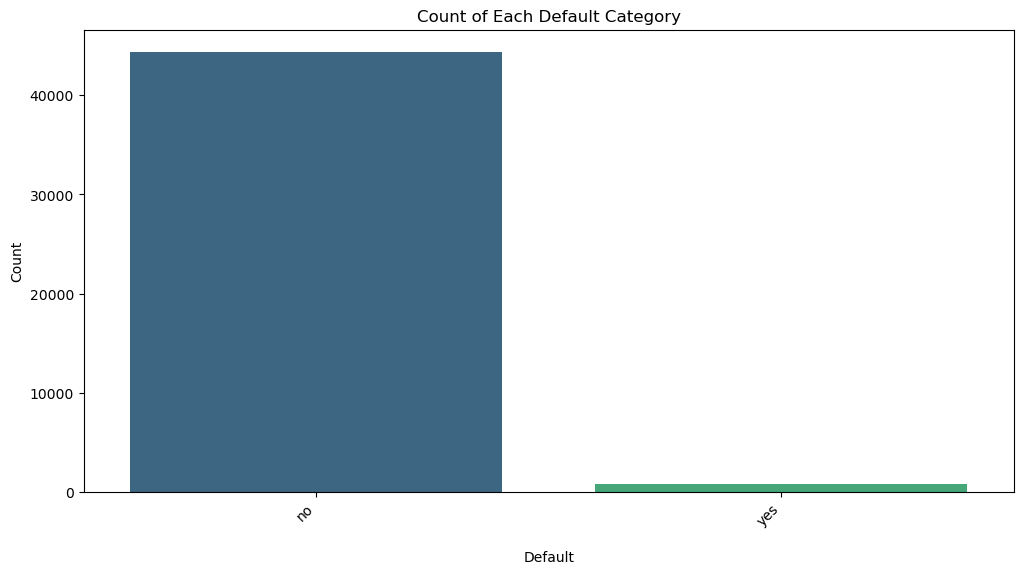

In [74]:
default_counts = train_df['default'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=default_counts.index, y=default_counts.values, palette='viridis')
plt.title('Count of Each Default Category')
plt.xlabel('\nDefault')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## `Housing Feature`

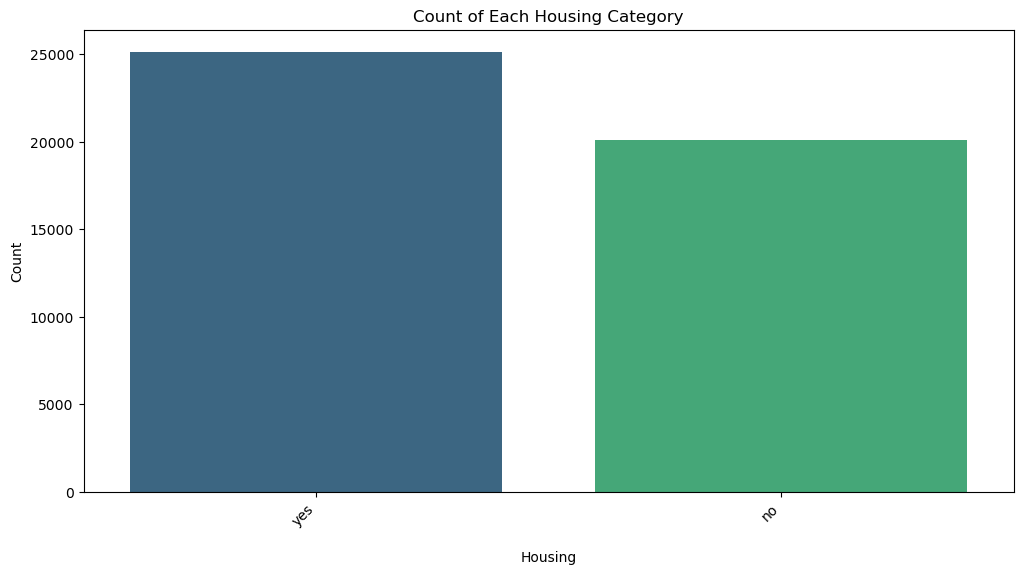

In [75]:
housing_counts = train_df['housing'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=housing_counts.index, y=housing_counts.values, palette='viridis')
plt.title('Count of Each Housing Category')
plt.xlabel('\nHousing')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## `Loan Feature`

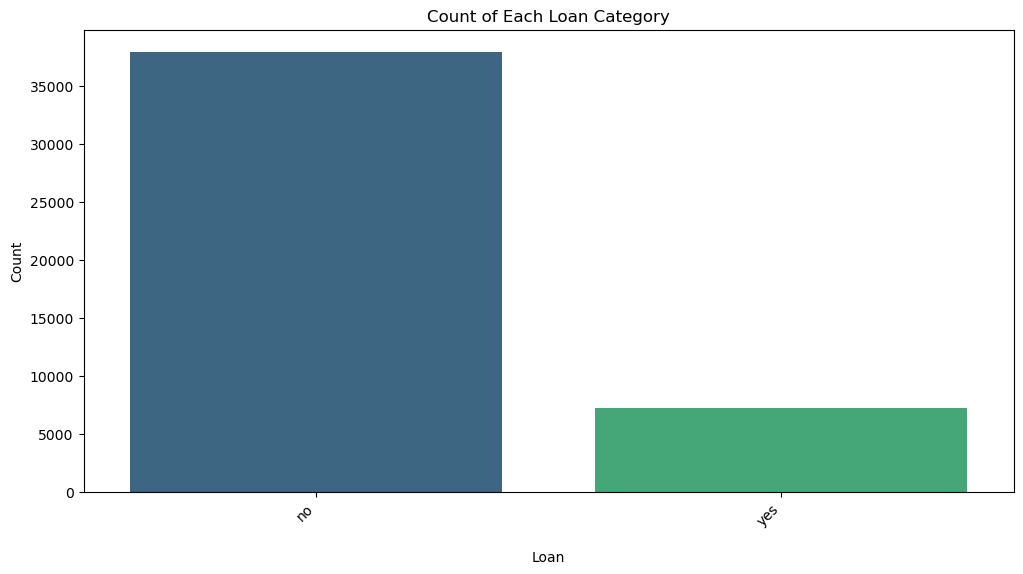

In [76]:
loan_counts = train_df['loan'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=loan_counts.index, y=loan_counts.values, palette='viridis')
plt.title('Count of Each Loan Category')
plt.xlabel('\nLoan')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## `Contact Feature`

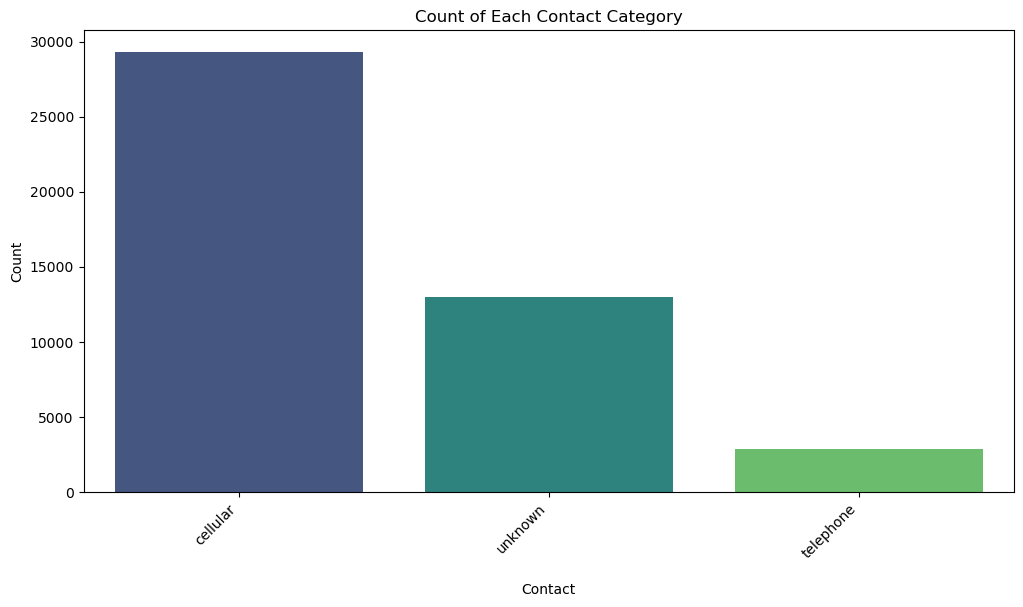

In [77]:
contact_counts = train_df['contact'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=contact_counts.index, y=contact_counts.values, palette='viridis')
plt.title('Count of Each Contact Category')
plt.xlabel('\nContact')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## `Month Feature`

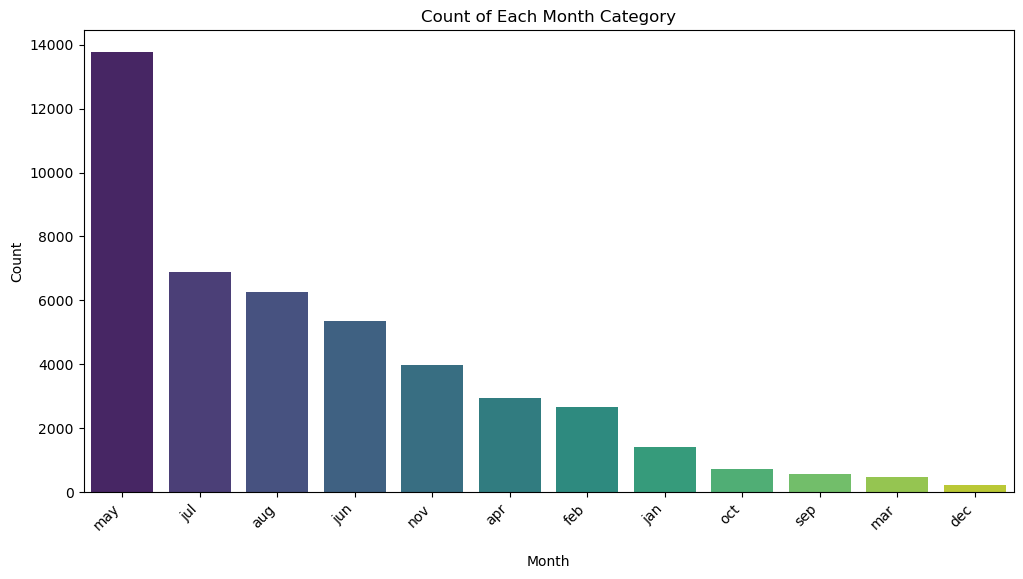

In [78]:
month_counts = train_df['month'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.title('Count of Each Month Category')
plt.xlabel('\nMonth')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## `Poutcome Feature`

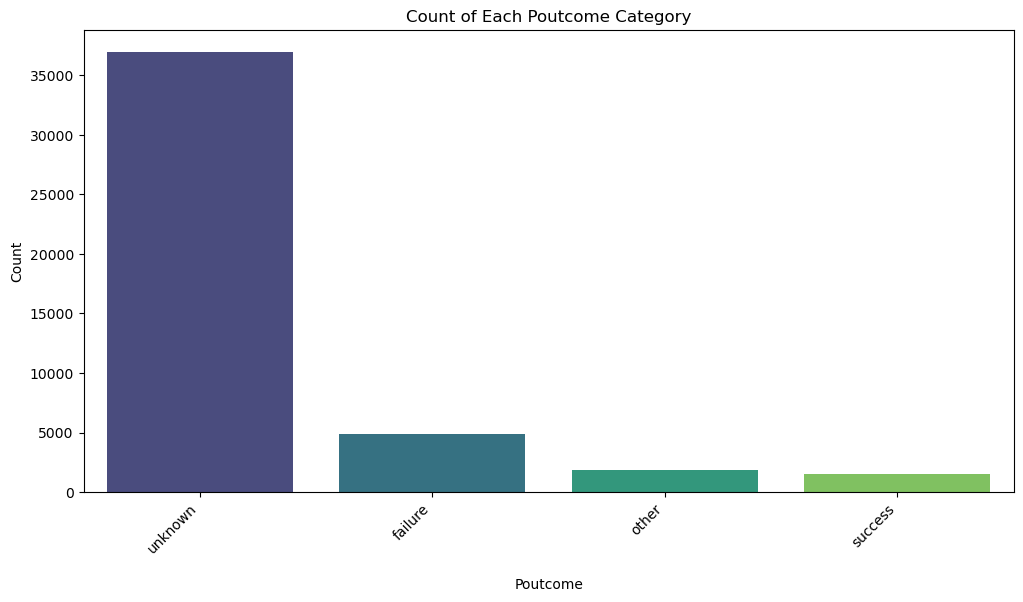

In [79]:
poutcome_counts = train_df['poutcome'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=poutcome_counts.index, y=poutcome_counts.values, palette='viridis')
plt.title('Count of Each Poutcome Category')
plt.xlabel('\nPoutcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## `Target class imbalance`

Count of each Status:
no     39922
yes     5289
Name: y, dtype: int64



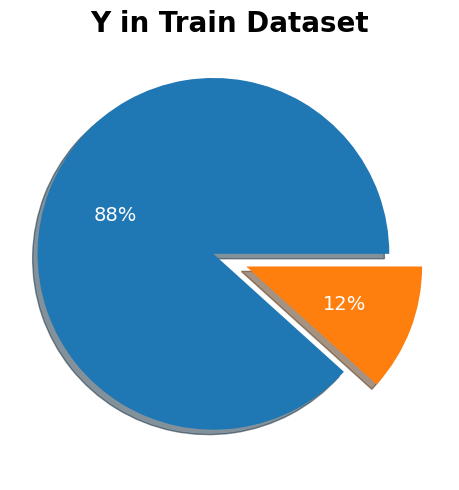

In [80]:
status_counts = train_df['y'].value_counts()
print("Count of each Status:")
print(status_counts)
print()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.pie(
    train_df['y'].value_counts(), 
    shadow=True, 
    explode=[.1 for i in range(train_df['y'].nunique())],
    autopct='%1.f%%',
    textprops={'size': 14, 'color': 'white'}
)
ax.set_title('Y in Train Dataset', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()